# AI28 - Machine Learning 
GLANDIER Quentin \
CHEMANACK Thierry \
GI04

## <center>TP N° 1 - Partie 5</center>
## <center>Seaborn</center>
<br>
<br>

### **1 - Données iris**

Dimensions du dataset :  (150, 5)

Noms et types de variables : 
sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Statistiques de base : 
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


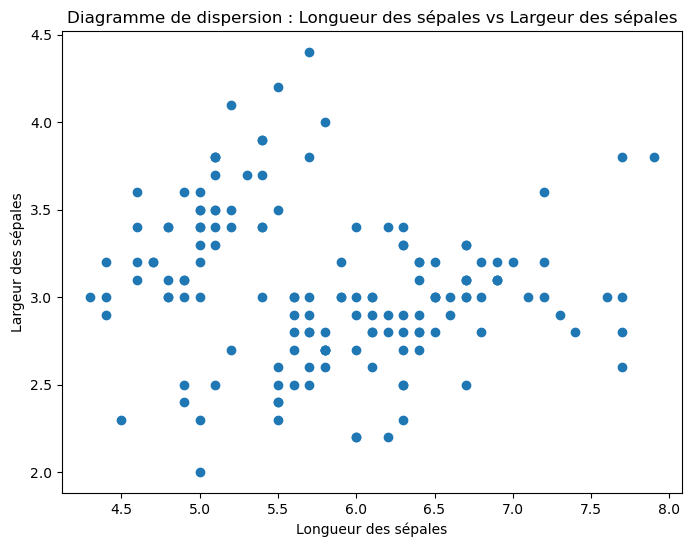

Les graphiques des distributions bivariées par paires de variables montrent la relation entre chaque paire de variables dans le dataset iris.


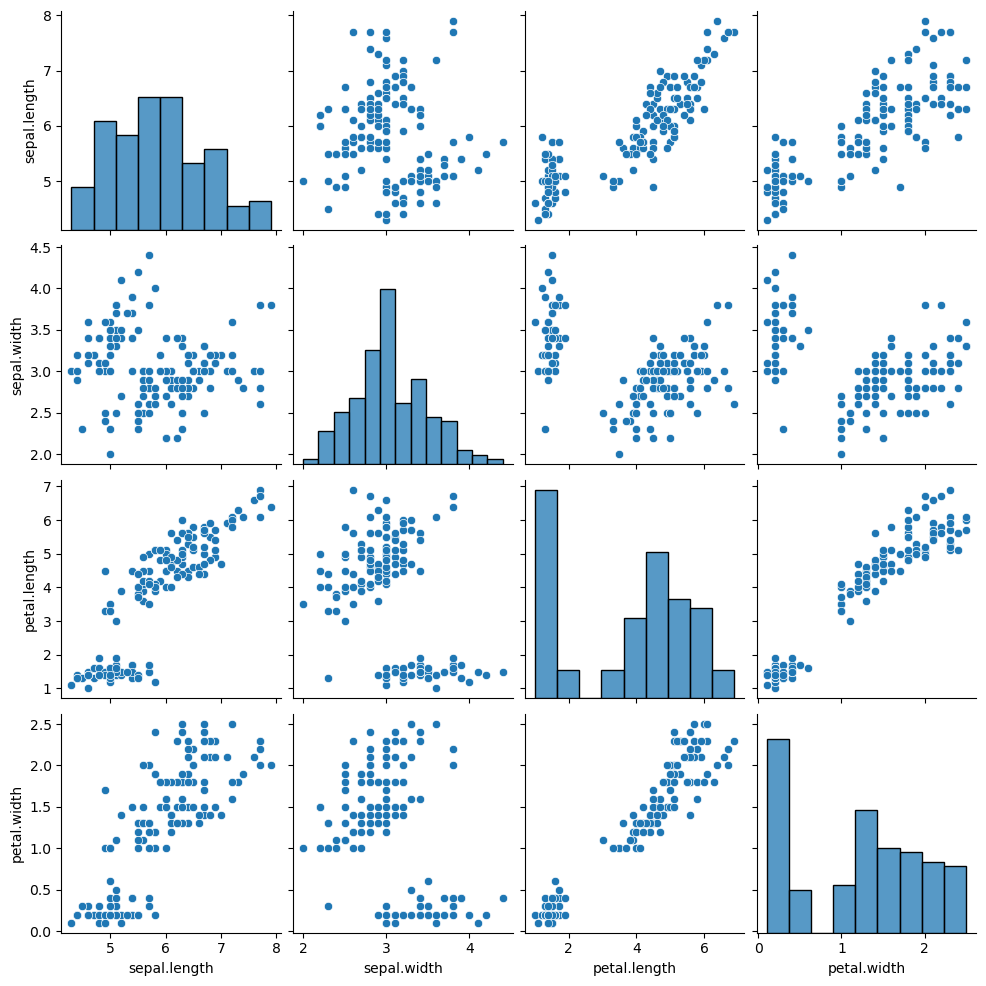

Les pairplots avec le paramètre hue=variety permettent de visualiser les distributions bivariées en distinguant les différentes variétés de fleurs d'iris.


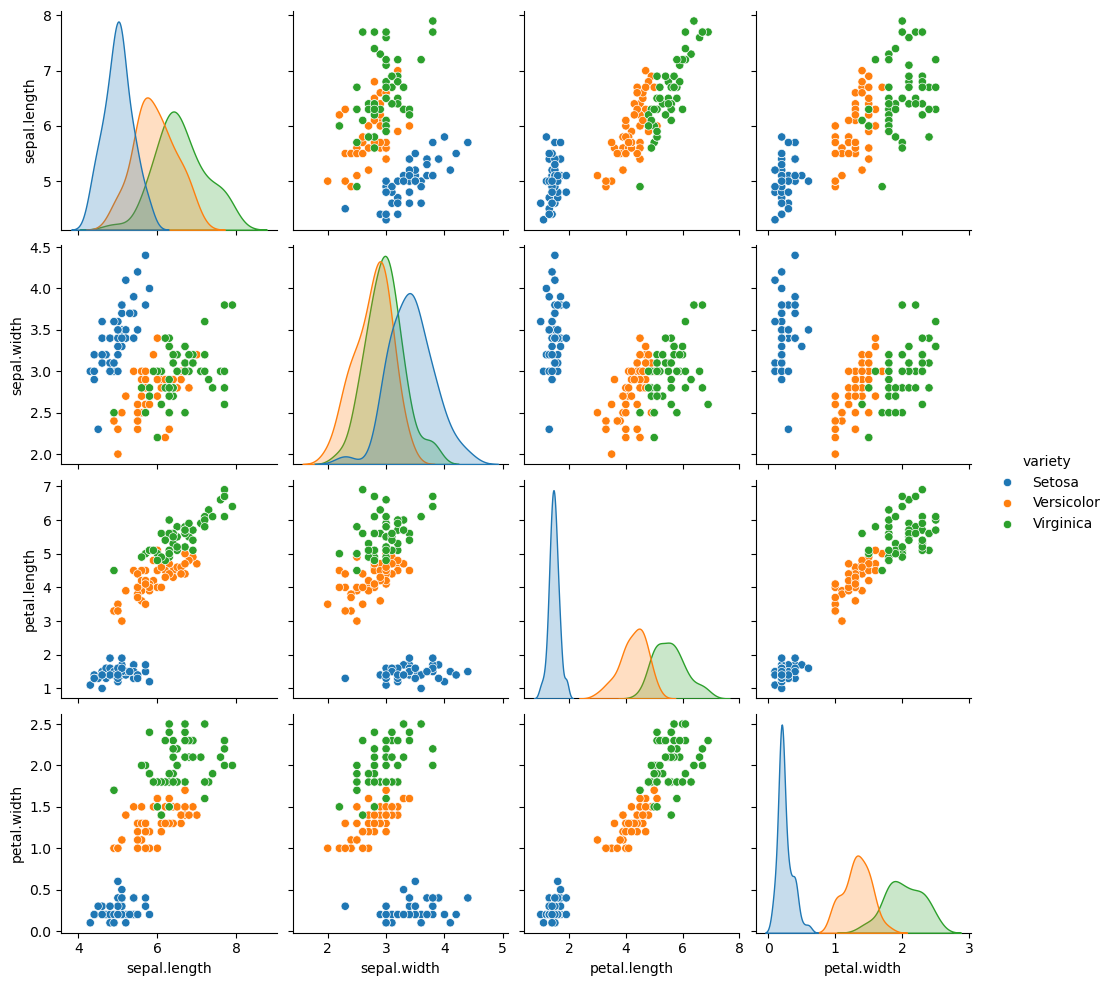

In [4]:
# 1. Importer les librairies nécessaires
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 2. Charger le dataset iris.csv dans un dataframe avec Pandas
iris_df = pd.read_csv('data/iris.csv')

# 3. Donner une description du dataset
print("Dimensions du dataset : ", iris_df.shape)
print("\nNoms et types de variables : ")
print(iris_df.dtypes)
print("\nStatistiques de base : ")
print(iris_df.describe())

# 4. Faire un scatter plot de iris['sepal.length'] et iris['sepal.width']
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal.length'], iris_df['sepal.width'])
plt.xlabel('Longueur des sépales')
plt.ylabel('Largeur des sépales')
plt.title('Diagramme de dispersion : Longueur des sépales vs Largeur des sépales')
plt.show()

# 5. Tracer les graphiques des distributions bivariées par paires de variables dans le dataframe iris avec pairplot de Seaborn
print("Les graphiques des distributions bivariées par paires de variables montrent la relation entre chaque paire de variables dans le dataset iris.")
sns.pairplot(iris_df)
plt.show()

# 6. Retracer les pairplots des distributions avec le paramètre hue=variety
print("Les pairplots avec le paramètre hue=variety permettent de visualiser les distributions bivariées en distinguant les différentes variétés de fleurs d'iris.")
sns.pairplot(iris_df, hue='variety')
plt.show()


### **2 - Parcelles de distribution avec Seaborn (dataset titanic)**


 ---  1. Télécharger le dataset Titanic directement depuis Seaborn 


 ---  2. Filtrer le dataframe df_titanic avec les méthodes drop et dropna 


 ---  3. Tracer les graphiques des distributions bivariées de titanic 

Les graphiques des distributions bivariées montrent les relations entre chaque paire de variables dans le dataset Titanic.


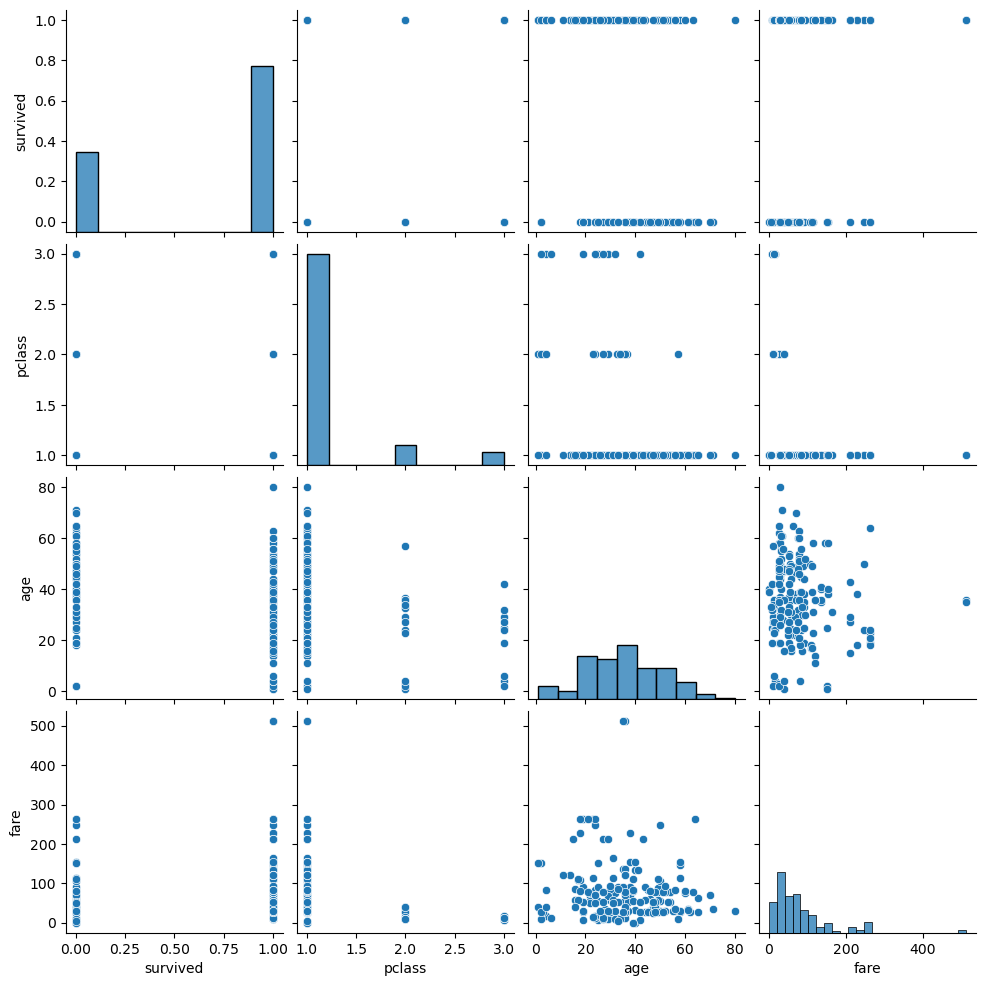


 ---  4. Graphiques pour des catégories avec sns.catplot 

Le graphique catplot montre l'âge des passagers en fonction de la classe et du sexe.


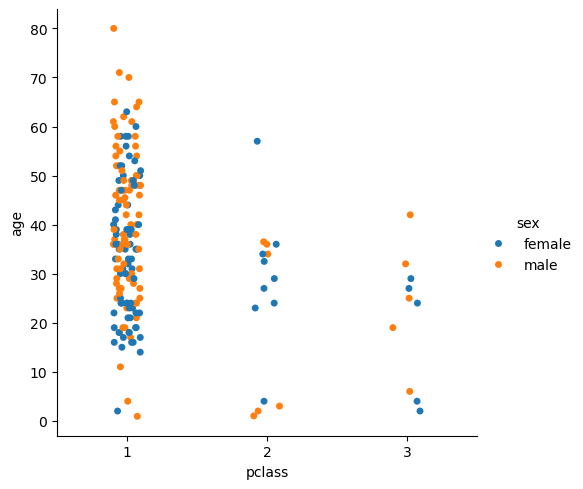


 ---  5. Boxplot de la variable age en fonction de pclass selon le sexe 



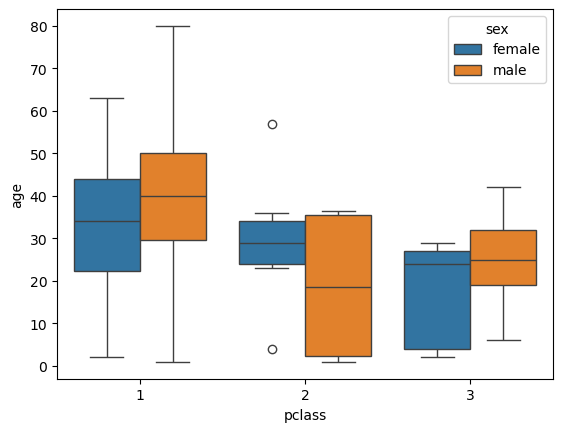


 ---  6. Violinplot de la variable age en fonction de pclass selon le sexe 



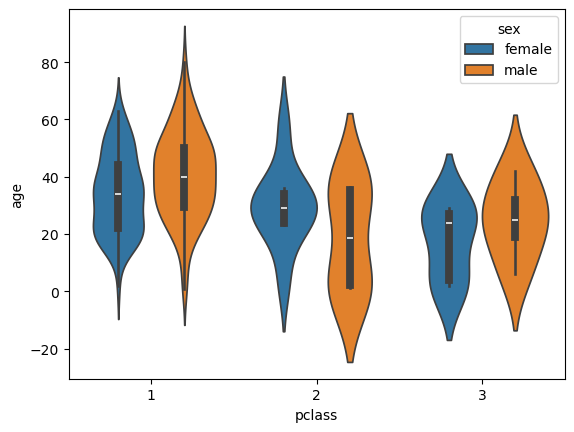


 ---  7. Jointplot pour tracer la distribution conjointe et les distributions marginales ensemble 



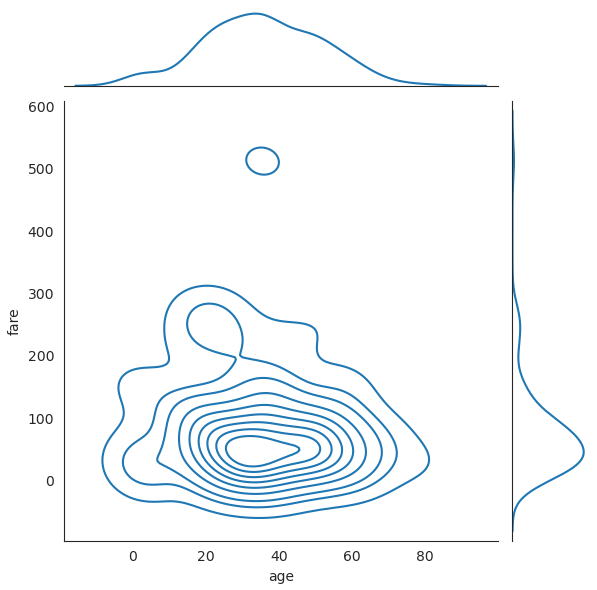


 ---  8. Tracer la distribution de la variable age avec distplot 



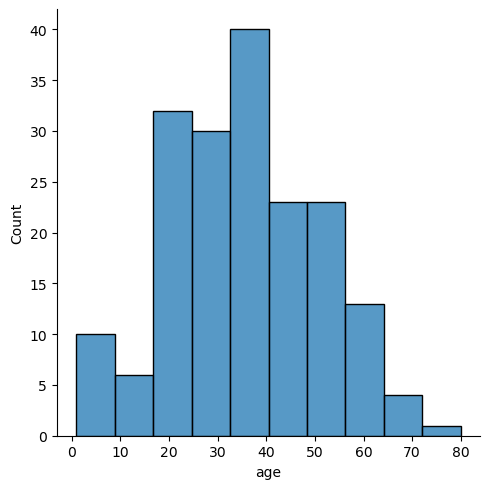


 ---  9. Matrice de corrélation avec heatmap 



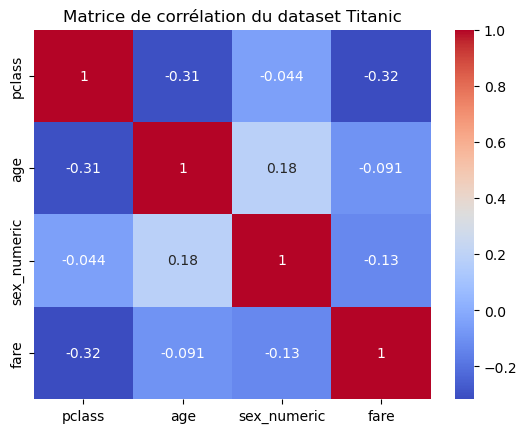

In [24]:
def p(x):
    print("\n --- ", x, "\n")

p("1. Télécharger le dataset Titanic directement depuis Seaborn")
df_titanic = sns.load_dataset('titanic')

p("2. Filtrer le dataframe df_titanic avec les méthodes drop et dropna")
df_titanic.drop(columns=['sibsp', 'alone', 'adult_male', 'parch'], inplace=True)  # Supprimer certaines colonnes
df_titanic.dropna(inplace=True)  # Supprimer les lignes contenant des valeurs manquantes

p("3. Tracer les graphiques des distributions bivariées de titanic")
print("Les graphiques des distributions bivariées montrent les relations entre chaque paire de variables dans le dataset Titanic.")
sns.pairplot(df_titanic)
plt.show()

p("4. Graphiques pour des catégories avec sns.catplot")
print("Le graphique catplot montre l'âge des passagers en fonction de la classe et du sexe.")
sns.catplot(x='pclass', y='age', data=df_titanic, hue='sex')
plt.show()

p("5. Boxplot de la variable age en fonction de pclass selon le sexe")
sns.boxplot(x='pclass', y='age', data=df_titanic, hue='sex')
plt.show()

p("6. Violinplot de la variable age en fonction de pclass selon le sexe")
sns.violinplot(x='pclass', y='age', data=df_titanic, hue='sex')
plt.show()

p("7. Jointplot pour tracer la distribution conjointe et les distributions marginales ensemble")
with sns.axes_style('white'):
    sns.jointplot(x='age', y='fare', data=df_titanic, kind='kde')
plt.show()

p("8. Tracer la distribution de la variable age avec distplot")
sns.displot(df_titanic['age']) # distplot déprécié
plt.show()

p("9. Matrice de corrélation avec heatmap")
# Convertir la variable 'sex' en variable numérique
df_titanic['sex_numeric'] = df_titanic['sex'].map({'female': 0, 'male': 1})
# Sélectionner les colonnes 'pclass', 'age' et 'sex_numeric'
selected_columns = ['pclass', 'age', 'sex_numeric', 'fare']
selected_data = df_titanic[selected_columns]
# Calculer la corrélation entre ces colonnes
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation du dataset Titanic')
plt.show()
